<a href="https://colab.research.google.com/github/mohamadhasan-zeinali/text-classification-using-Bert/blob/main/Text_classification_using_bert_%26_tensoreflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install tensorflow

In [ ]:
pip install tensorflow_text

     |████████████████████████████████| 4.9 MB 5.1 MB/s 


In [ ]:
#import library

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
import pandas as pd



In [ ]:
#load data
path = "/content/drive/MyDrive/sheets/SPAM text message 20170820 - Data.csv"
df = pd.read_csv(path)
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
#show group of data 

df.groupby('Category').describe()

Message                                                               
           count unique                                                top freq
Category                                                                       
ham         4825   4516                             Sorry, I'll call later   30
spam         747    641  Please call our customer service representativ...    4

In [ ]:
#count-data 

df['Category'].value_counts()


ham     4825
spam     747
Name: Category, dtype: int64

In [ ]:
747/4825


0.15481865284974095

In [ ]:
#create data frem 

df_spam = df[df['Category']=='spam']
df_spam.shape

(747, 2)

In [ ]:
df_ham = df[df['Category']=='ham']
df_ham.shape

(4825, 2)

In [ ]:
#balance data  >> down-sampling technic

df_ham_sampled = df_ham.sample(df_spam.shape[0])
df_ham_sampled.shape

(747, 2)

In [ ]:

#balance

df.balanced  = pd.concat([df_spam,df_ham_sampled])
df.balanced.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  after removing the cwd from sys.path.


(1494, 2)

In [ ]:
df.balanced['Category'].value_counts()

spam    747
ham     747
Name: Category, dtype: int64

In [ ]:
df.balanced.sample(5)

,Category,Message
2951,ham,Where are you ? You said you would be here whe...
4820,ham,Got smaller capacity one? Quite ex...
650,spam,"You have won ?1,000 cash or a ?2,000 prize! To..."
259,spam,We tried to contact you re your reply to our o...
236,ham,I have printed it oh. So &lt;#&gt; come upst...


In [ ]:
df.balanced['spam'] = df.balanced['Category'].apply(lambda x: 1  if  x=='spam' else 0)
df.balanced.sample(5)

,Category,Message,spam
1292,ham,Hey babe! I saw you came online for a second a...,0
2247,spam,Hi ya babe x u 4goten bout me?' scammers getti...,1
2987,spam,Reply to win £100 weekly! What professional sp...,1
3111,spam,Good Luck! Draw takes place 28th Feb 06. Good ...,1
4534,spam,Gr8 new service - live sex video chat on your ...,1


#model_selection

In [ ]:
#load sklearn library 

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.balanced['Message'],
                        df.balanced['spam'], stratify = df.balanced['spam'])

In [ ]:
x_train.head(4)

4896    Want the latest Video handset? 750 anytime any...
310     Where are the garage keys? They aren't on the ...
5055    Double Mins & Double Txt & 1/2 price Linerenta...
4489            Call me when you get the chance plz &lt;3
Name: Message, dtype: object

#bert preprocess

In [ ]:
bert_preprocess  = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

#embeding


In [ ]:
def  get_sentence_embeding(sentences):
     preprocess_text= bert_preprocess(sentences)
     return  bert_encoder(preprocess_text)['pooled_output']

get_sentence_embeding([
          "500$ discount. hurry up",
          "Bhavin, are you up for a volleybal game tomorrow?"
])

<tf.Tensor: shape=(2, 768), dtype=float32, numpy=
array([[-0.843517  , -0.5132726 , -0.8884573 , ..., -0.7474886 ,
        -0.7531474 ,  0.91964495],
       [-0.8720836 , -0.50543964, -0.94446677, ..., -0.858475  ,
        -0.7174534 ,  0.88082975]], dtype=float32)>

#get embeding vector

In [ ]:
e = get_sentence_embeding([
    "banana", 
    "grapes",
    "mango",
    "jeff bezos",
    "elon musk",
    "bill gates"
]
)

In [ ]:
e

<tf.Tensor: shape=(6, 768), dtype=float32, numpy=
array([[-0.7606917 , -0.14219375,  0.49604657, ...,  0.4216535 ,
        -0.5322139 ,  0.80312175],
       [-0.86023194, -0.21242912,  0.49157023, ...,  0.39798135,
        -0.6050627 ,  0.8447164 ],
       [-0.7128861 , -0.154639  ,  0.38401696, ...,  0.35278732,
        -0.5099133 ,  0.734741  ],
       [-0.8253345 , -0.3555056 , -0.59069616, ..., -0.01613677,
        -0.6141757 ,  0.8723029 ],
       [-0.7504135 , -0.2681262 , -0.266897  , ...,  0.02839394,
        -0.5938099 ,  0.7974987 ],
       [-0.78544354, -0.29949662,  0.41027504, ...,  0.5222545 ,
        -0.49573535,  0.8150749 ]], dtype=float32)>

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity([e[0]], [e[1]])

array([[0.9911089]], dtype=float32)

In [ ]:
cosine_similarity([e[0]], [e[3]])

array([[0.84703845]], dtype=float32)

In [ ]:
cosine_similarity([e[4]], [e[1]])

array([[0.9166687]], dtype=float32)

# Build Model

In [ ]:
#1 sequence  2 function
#bert layers
text_input  = tf.keras.layers.Input(shape=(),dtype=tf.string, name="text")
preprocess_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocess_text)

#create neural networks layers
l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(l)

# Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[text_input], outputs = [l])

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer_3 (KerasLayer)     {'input_mask': (Non  0           ['text[0][0]']                   
                                e, 128),                                                          
                                 'input_word_ids':                                                
                                (None, 128),                                                      
                                 'input_type_ids':                                                
                                (None, 128)}                                                

#compile model

In [ ]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=METRICS)

#train model 

In [50]:
model.fit(x_train,y_train, epochs=10)

Epoch 1/10
35/35 [==============================] - 493s 14s/step - loss: 0.6691 - accuracy: 0.6107 - precision: 0.6115 - recall: 0.6071
Epoch 2/10
35/35 [==============================] - 487s 14s/step - loss: 0.5216 - accuracy: 0.8134 - precision: 0.7863 - recall: 0.8607
Epoch 3/10
35/35 [==============================] - 488s 14s/step - loss: 0.4544 - accuracy: 0.8438 - precision: 0.8336 - recall: 0.8589
Epoch 4/10
35/35 [==============================] - 481s 14s/step - loss: 0.4028 - accuracy: 0.8768 - precision: 0.8601 - recall: 0.9000
Epoch 5/10
35/35 [==============================] - 478s 14s/step - loss: 0.3708 - accuracy: 0.8884 - precision: 0.8809 - recall: 0.8982
Epoch 6/10
35/35 [==============================] - 482s 14s/step - loss: 0.3467 - accuracy: 0.8875 - precision: 0.8794 - recall: 0.8982
Epoch 7/10
35/35 [==============================] - 502s 14s/step - loss: 0.3301 - accuracy: 0.8857 - precision: 0.8636 - recall: 0.9161
Epoch 8/10
35/35 [=======================

In [52]:

model.evaluate(x_test, y_test)

12/12 [==============================] - 166s 14s/step - loss: 0.3086 - accuracy: 0.8984 - precision: 0.8860 - recall: 0.9144


[0.3085762858390808,
 0.8983957171440125,
 0.8860103487968445,
 0.9144384860992432]

In [53]:
y_predicted = model.predict(x_test)
y_predicted = y_predicted.flatten()

In [54]:
import numpy as np

y_predicted = np.where(y_predicted > 0.5, 1, 0)
y_predicted

array([1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,

In [55]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_predicted)
cm 

array([[165,  22],
       [ 16, 171]])

Text(33.0, 0.5, 'Truth')

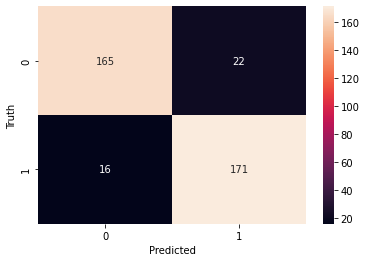

In [56]:
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [57]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.91      0.88      0.90       187
           1       0.89      0.91      0.90       187

    accuracy                           0.90       374
   macro avg       0.90      0.90      0.90       374
weighted avg       0.90      0.90      0.90       374



#inference

In [58]:
reviews = [
    'Enter a chance to win $5000, hurry up, offer valid until march 31, 2021',
    'You are awarded a SiPix Digital Camera! call 09061221061 from landline. Delivery within 28days. T Cs Box177. M221BP. 2yr warranty. 150ppm. 16 . p pÂ£3.99',
    'it to 80488. Your 500 free text messages are valid until 31 December 2005.',
    'Hey Sam, Are you coming for a cricket game tomorrow',
    "Why don't you wait 'til at least wednesday to see if you get your ."
]
model.predict(reviews)

array([[0.7541542 ],
       [0.8296708 ],
       [0.7762356 ],
       [0.18873245],
       [0.11655334]], dtype=float32)